In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# Load and preprocessing the test images
test_dir = '/content/dataset/test_2'

#Resize images
img_width = 224
img_height = 224
image_size = (img_width, img_height)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        )

test = test_datagen.flow_from_directory(batch_size=128,
                                                     directory=test_dir,
                                                     target_size=image_size,
                                                      color_mode = 'rgb',
                                                     class_mode=None)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
#Convert to LAB
test_img = []
for img in test[0]:
  try:
    lab = rgb2lab(img)
    test_img.append(lab[:,:,0])
  except:
    print('error')
test_img = np.array(test_img)

test_img = test_img.reshape(test_img.shape+(1,)) #dimensions to be the same for test_img


grayscale = np.zeros((224, 224, 3))
grayscale[:,:,0] = test_img[12][:,:,0]
grayscale = resize(grayscale, (800,600))
gray_img = lab2rgb(grayscale)

output1 = model.predict(test_img)
output1 = output1*128

result = np.zeros((224, 224, 3))
result[:,:,0] = test_img[12][:,:,0]
result[:,:,1:] = output1[0]
result = resize(result, (800,600))
color_img = lab2rgb(result)

titles = ['Grayscale Image', 'Colored Image']
images = [gray_img, color_img]

4/4 [==============================] - 0s 84ms/step


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 207 pixels
  return func(*args, **kwargs)


In [ ]:
print(color_img.shape)

(800, 600, 3)


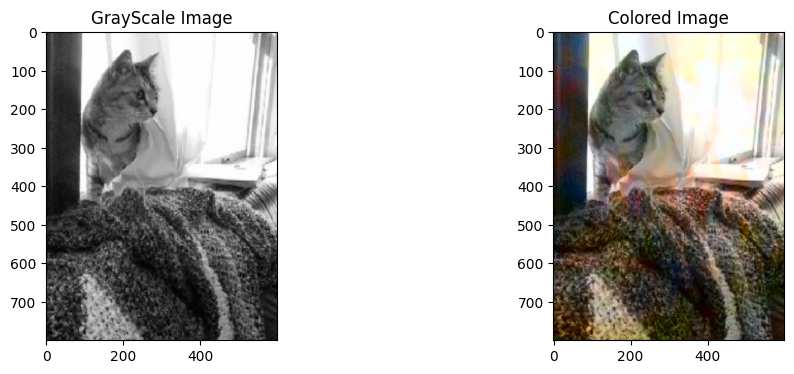

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("GrayScale Image")
plt.imshow(gray_img)

plt.subplot(1, 2, 2)
plt.title("Colored Image")
plt.imshow(color_img)

plt.show()